In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
 import numpy as np
import pandas as pd
import datetime as dt

In [3]:
 # Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [25]:
# reflect an existing database into a new model
Base= automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [26]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [27]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [28]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [32]:
# Find the most recent date in the data set. 
engine.execute('SELECT max(date) FROM Measurement').fetchall()

('2017-08-23',)

In [38]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-24").\
    filter(Measurement.date <= "2017-08-23").all()


In [41]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(precipitation_data)
precipitation_df.head()

# Sort the dataframe by date
precipitation_df=precipitation_df.rename(columns={0:'date',1:'precipitation'})

precipitation_df = precipitation_df.sort_values(by='date').dropna()
precipitation_df.head()


,date,precipitation
0,2016-08-24,0.08
1524,2016-08-24,2.15
702,2016-08-24,2.28
360,2016-08-24,2.15
1875,2016-08-24,1.45


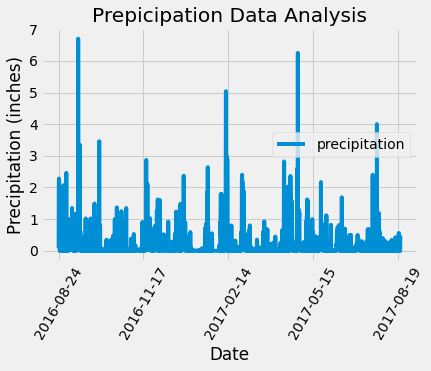

In [45]:
# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot('date','precipitation')
plt.title('Prepicipation Data Analysis')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.xticks(rotation = 60)
plt.savefig("Resources/Precipitation_data_analysis.png")

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
 

In [13]:
# Design a query to calculate the total number stations in the dataset
 

In [14]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
 

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

In [17]:
# Close Session
session.close()